In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
%pwd
%cd /content/drive/MyDrive/5836/
%ls

ModuleNotFoundError: No module named 'google.colab'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load data
dataset_path = 'abalone/abalone.data'
column = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data = pd.read_csv(dataset_path, header = None, names = column)

print(data.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


# 1. Data processing

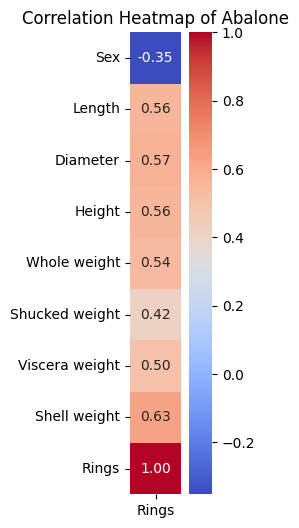

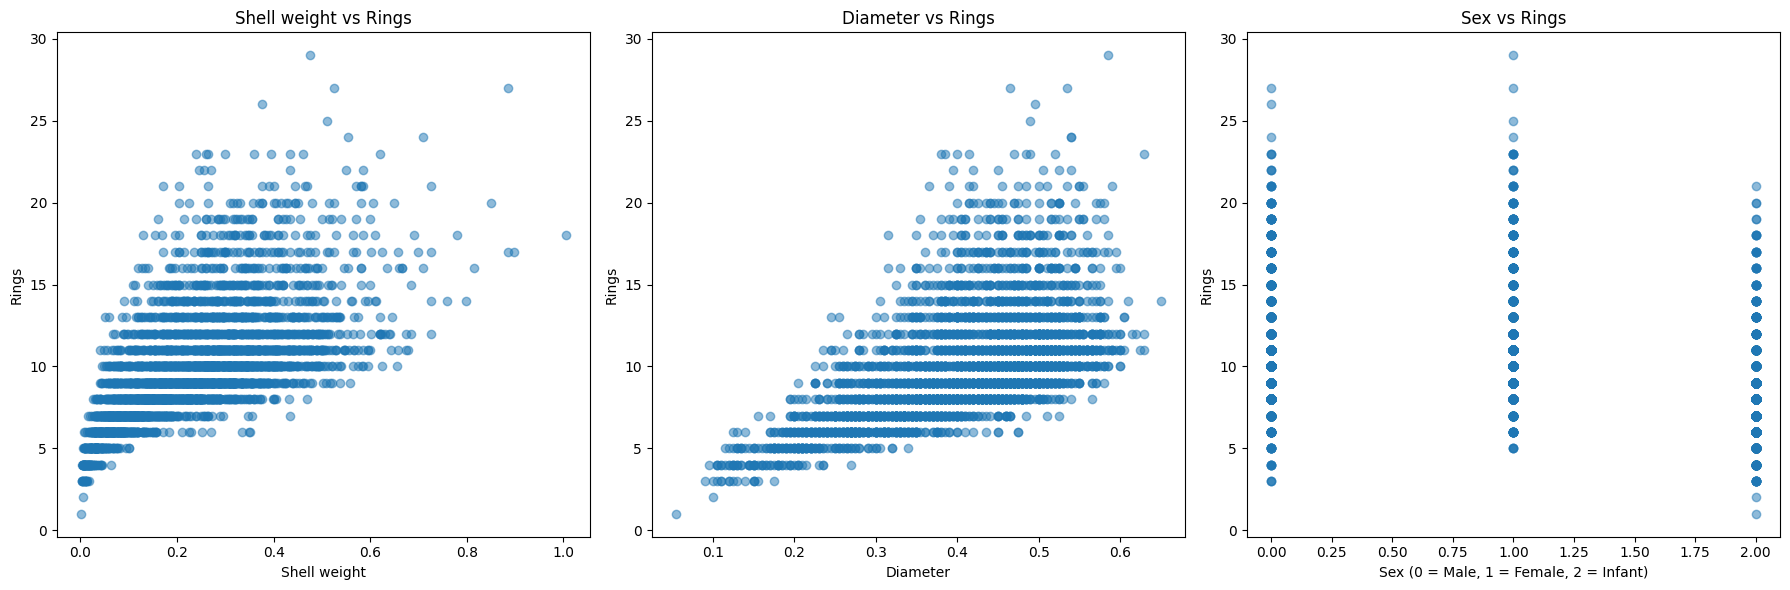

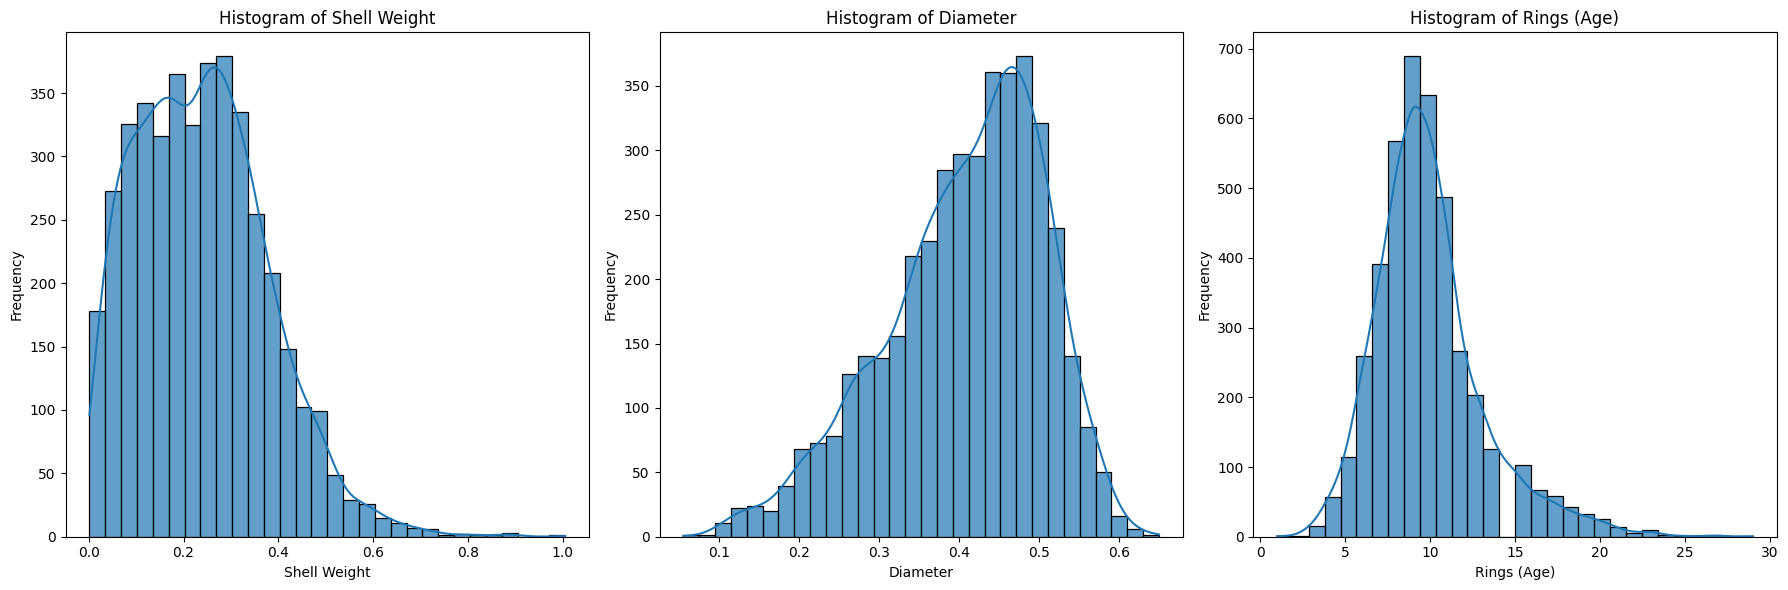

Training set size (features): 2506
Testing set size (features): 1671


In [11]:
# Step1. Clean  data
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Step2. Heatmap
correlation_matrix = data.corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
correlation_with_rings = correlation_matrix.loc[:, ['Rings']]
plt.figure(figsize=(2, 6))
sns.heatmap(correlation_with_rings, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)

plt.title('Correlation Heatmap of Abalone')
plt.show()

# Step3. Scatter plot
plt.figure(figsize=(18, 6))
# Shell weight vs Rings
plt.subplot(1, 3, 1)
plt.scatter(data['Shell weight'], data['Rings'], alpha=0.5)
plt.title('Shell weight vs Rings')
plt.xlabel('Shell weight')
plt.ylabel('Rings')

# Diameter vs Rings
plt.subplot(1, 3, 2)
plt.scatter(data['Diameter'], data['Rings'], alpha=0.5)
plt.title('Diameter vs Rings')
plt.xlabel('Diameter')
plt.ylabel('Rings')

# Sex vs Rings
plt.subplot(1, 3, 3)
plt.scatter(data['Sex'], data['Rings'], alpha=0.5)
plt.title('Sex vs Rings')
plt.xlabel('Sex (0 = Male, 1 = Female, 2 = Infant)')
plt.ylabel('Rings')

plt.tight_layout()
plt.show()

# Step4. Histograms
plt.figure(figsize=(18, 6))

# Shell weight
plt.subplot(1, 3, 1)
sns.histplot(data['Shell weight'], bins=30, kde=True, alpha=0.7)
plt.title('Histogram of Shell Weight')
plt.xlabel('Shell Weight')
plt.ylabel('Frequency')

# Diameter
plt.subplot(1, 3, 2)
sns.histplot(data['Diameter'], bins=30, kde=True, alpha=0.7)
plt.title('Histogram of Diameter')
plt.xlabel('Diameter')
plt.ylabel('Frequency')

# Rings (age)
plt.subplot(1, 3, 3)
sns.histplot(data['Rings'], bins=30, kde=True, alpha=0.7)
plt.title('Histogram of Rings (Age)')
plt.xlabel('Rings (Age)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step5. dataset split
X = data.drop(columns=['Rings'])
y = data['Rings']

random_seed = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_seed)

print(f'Training set size (features): {X_train.shape[0]}')
print(f'Testing set size (features): {X_test.shape[0]}')
# print(f'Training set size (target): {y_train.shape[0]}')
# print(f'Testing set size (target): {y_test.shape[0]}')


# 2. Modelling
step1. Linear regression

Feature Coefficients:
Sex: -0.3502
Length: 0.9866
Diameter: 10.2569
Height: 9.0197
Whole weight: 9.4170
Shucked weight: -19.9996
Viscera weight: -9.8447
Shell weight: 7.2013
Intercept: 3.7384

RMSE: 2.1396405302955057
R-squared: 0.5643630095709802


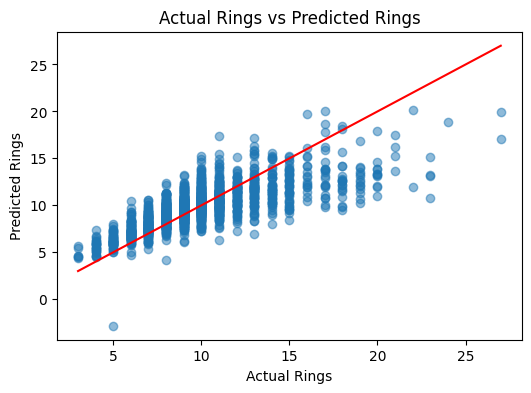

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_
feature_names = X.columns
coef_summary = dict(zip(feature_names, coefficients))

print("Feature Coefficients:")
for feature, coef in coef_summary.items():
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}\n")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual Rings vs Predicted Rings')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

step2. Compare linear/logistic regression model

step2.1 Normalization (Linear regression)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_normalized = LinearRegression()
model_normalized.fit(X_train_scaled, y_train)
y_pred_normalized = model_normalized.predict(X_test_scaled)

coefficients_normalized = model_normalized.coef_
intercept_normalized = model_normalized.intercept_
coef_summary_normalized = dict(zip(feature_names, coefficients_normalized))

print("Feature Coefficients (With Normalization):")
for feature, coef in coef_summary_normalized.items():
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept_normalized:.4f}\n")

rmse_normalized = np.sqrt(mean_squared_error(y_test, y_pred_normalized))
r_squared_normalized = r2_score(y_test, y_pred_normalized)
print(f'RMSE (With Normalization): {rmse_normalized}')
print(f'R-squared (With Normalization): {r_squared_normalized}')

Feature Coefficients (With Normalization):
Sex: -0.7003
Length: 0.7301
Diameter: 6.1029
Height: 10.1922
Whole weight: 26.1557
Shucked weight: -29.7395
Viscera weight: -7.4770
Shell weight: 7.2266
Intercept: 4.3813

RMSE (With Normalization): 2.139640530295506
R-squared (With Normalization): 0.5643630095709802


step2.2 Logistic regression

AUC Score: 0.8675268564416756
AUC Score (With Normalization): 0.8596999991399057


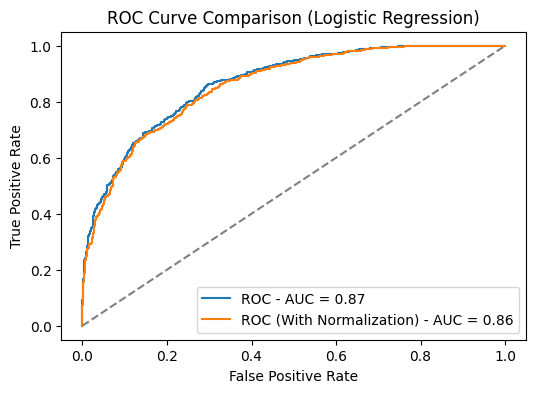

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, (y_train > np.median(y_train)).astype(int))
y_pred_logistic = logistic_model.predict(X_test)

# calculate AUC and ROC
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score((y_test > np.median(y_test)).astype(int), y_pred_prob)

fpr, tpr, _ = roc_curve((y_test > np.median(y_test)).astype(int), y_pred_prob)

# Logistic Regression Model（with Normalization）
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, (y_train > np.median(y_train)).astype(int))
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculate AUC and ROC with normalizatio
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]
auc_score_nor = roc_auc_score((y_test > np.median(y_test)).astype(int), y_pred_prob)

fpr_nor, tpr_nor, _ = roc_curve((y_test > np.median(y_test)).astype(int), y_pred_prob)

# AUC score
print(f'AUC Score: {auc_score}')
print(f'AUC Score (With Normalization): {auc_score_nor}')

# ROC plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC - AUC = {auc_score:.2f}')
plt.plot(fpr_nor, tpr_nor, label=f'ROC (With Normalization) - AUC = {auc_score_nor:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


step3. Linear/logistic regression model with two selected input features


P-values for features:
 const             3.506782e-23
Sex               1.643444e-08
Length            6.704882e-01
Diameter          3.084736e-04
Height            4.858648e-07
Whole weight      1.937885e-23
Shucked weight    2.722161e-74
Viscera weight    1.694652e-09
Shell weight      5.110844e-07
dtype: float64

Selected significant features: Index(['Shucked weight', 'Whole weight'], dtype='object')

Linear Regression Model with Selected Features:
Shucked weight: -23.7972
Whole weight: 13.9592
Intercept: 6.9127

Linear Model RMSE: 2.319470745310029
Linear Model R-squared: 0.4880578173231336


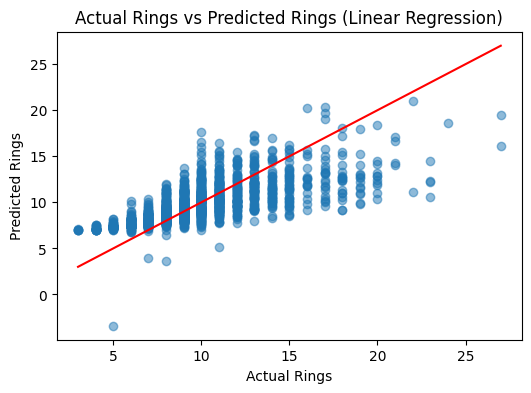


Logistic Model Accuracy: 0.6918013165769


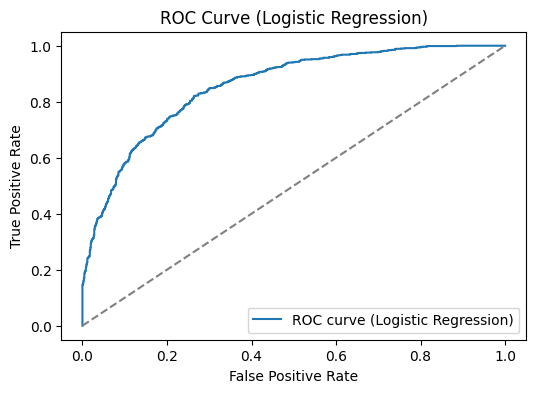

In [15]:
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const).fit()

# 输出每个特征的 p 值
p_values = model.pvalues
print("\nP-values for features:\n", p_values)

# 选择 p 值较小的两个特征
selected_features = p_values.drop('const').nsmallest(2).index
print(f"\nSelected significant features: {selected_features}")

# selected_features = ['Whole weight', 'Shucked weight']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

# 预测并评估
y_pred_linear = linear_model.predict(X_test_selected)
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print("\nLinear Regression Model with Selected Features:")
for feature, coef in zip(selected_features, coefficients):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}\n")

rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r_squared = r2_score(y_test, y_pred_linear)

print(f'Linear Model RMSE: {rmse}')
print(f'Linear Model R-squared: {r_squared}')

# 可视化实际值和预测值的关系
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.title('Actual Rings vs Predicted Rings (Linear Regression)')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

# Step 3: 逻辑回归模型
y_train_binary = (y_train > np.median(y_train)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

# 使用两个显著特征训练逻辑回归模型
logistic_model = LogisticRegression()
logistic_model.fit(X_train_selected, y_train_binary)

# 评估逻辑回归模型
y_pred_logistic = logistic_model.predict(X_test_selected)
accuracy = accuracy_score(y_test_binary, y_pred_logistic)

print(f'\nLogistic Model Accuracy: {accuracy}')

# 绘制 ROC 曲线
y_pred_prob = logistic_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (Logistic Regression)')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


step4. Neural network trained with SGD

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np

X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# 检查是否有空值
print(f"X has NaN: {X.isnull().values.any()}")
print(f"y has NaN: {y.isnull().values.any()}")

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# 检查空值是否已被处理
print(f"X NaN after fillna: {X.isnull().values.any()}")
print(f"y NaN after fillna: {y.isnull().values.any()}")

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# 训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.4, random_state=42)

# 定义神经网络模型
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.activation = nn.ReLU()

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))
        x = self.layers[-1](x)  # 输出层无激活函数
        return x

# 定义 R-squared 函数
def r_squared(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2.item()  # 返回标量值

# 训练和评估模型
def train_and_evaluate(X_train, y_train, X_test, y_test, hidden_size, num_layers, learning_rate, epochs, patience):
    input_size = X_train.shape[1]
    output_size = 1
    model = NeuralNetwork(input_size, hidden_size, num_layers, output_size)

    # 损失函数和优化器
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # 早停参数
    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(epochs):
        # 训练模式
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # 测试模式
        model.eval()
        with torch.no_grad():
            predictions_train = model(X_train)
            predictions_test = model(X_test)

            # 计算训练集和测试集的损失
            train_loss = criterion(predictions_train, y_train)
            test_loss = criterion(predictions_test, y_test)

            # 计算 R-squared
            train_r2 = r_squared(y_train, predictions_train)
            test_r2 = r_squared(y_test, predictions_test)

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], '
                  f'Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}')

        # 检查早停
        if test_loss < best_loss:
            best_loss = test_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    return best_loss, train_r2, test_r2

# 超参数搜索
hidden_sizes = [16, 32, 64]
num_layers_list = [1, 2, 3]
learning_rates = [0.1, 0.01, 0.001]
epochs = 1000
patience = 10

best_loss = float('inf')
best_params = {}
best_r2 = {}

for hidden_size in hidden_sizes:
    for num_layers in num_layers_list:
        for lr in learning_rates:
            print(f'\nTraining with hidden_size={hidden_size}, num_layers={num_layers}, learning_rate={lr}')
            test_loss, train_r2, test_r2 = train_and_evaluate(X_train, y_train, X_test, y_test, hidden_size, num_layers, lr, epochs, patience)

            # 更新最佳参数
            if test_loss < best_loss:
                best_loss = test_loss
                best_params = {
                    'hidden_size': hidden_size,
                    'num_layers': num_layers,
                    'learning_rate': lr
                }
                best_r2 = {
                    'train_r2': train_r2,
                    'test_r2': test_r2
                }

print(f'\nBest Parameters: {best_params}\n, Best Loss: {best_loss:.4f}, '
      f'Best Train R2: {best_r2["train_r2"]:.4f}, Best Test R2: {best_r2["test_r2"]:.4f}')


X has NaN: False
y has NaN: False
X NaN after fillna: False
y NaN after fillna: False

Training with hidden_size=16, num_layers=1, learning_rate=0.1
Early stopping at epoch 62

Training with hidden_size=16, num_layers=1, learning_rate=0.01
Epoch [100/1000], Train Loss: 7.2156, Test Loss: 6.4988, Train R2: 0.3261, Test R2: 0.3432
Epoch [200/1000], Train Loss: 6.8341, Test Loss: 6.1600, Train R2: 0.3617, Test R2: 0.3774
Epoch [300/1000], Train Loss: 6.5460, Test Loss: 5.9194, Train R2: 0.3886, Test R2: 0.4018
Epoch [400/1000], Train Loss: 6.2520, Test Loss: 5.6792, Train R2: 0.4161, Test R2: 0.4260
Epoch [500/1000], Train Loss: 5.9534, Test Loss: 5.4399, Train R2: 0.4440, Test R2: 0.4502
Epoch [600/1000], Train Loss: 5.6690, Test Loss: 5.2175, Train R2: 0.4705, Test R2: 0.4727
Epoch [700/1000], Train Loss: 5.4212, Test Loss: 5.0293, Train R2: 0.4937, Test R2: 0.4917
Epoch [800/1000], Train Loss: 5.2249, Test Loss: 4.8863, Train R2: 0.5120, Test R2: 0.5062
Epoch [900/1000], Train Loss: 5.